In [8]:
# 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#데이터프레임으로 데이터 읽어오기
df = pd.read_csv("data/winequality-red.csv")

print(df.shape)
df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 컬럼 정보
- fixed acidity : 고정산도
- volatile acidity : 휘발산도
- citric acid : 구연산의 함량
- residual sugar : 잔당(남은 설탕)
- chlorides : 염화물의 농도
- free sulfur dioxide : 유리 이산화황
- total sulfur dioxide : 총 이산화황
- density : 밀도
- pH : pH(산도)
- sulphates : 황산염
- alcohol : 알코올 농도(%)
- quality : 와인의 품질 점수

이 데이터는 fixed acidity ~alcohol 등을 통해 (독립변수 X)를 통해 quality(종속변수 y)를 예측하기 위한 데이터로 보임

In [14]:
#전체 컬럼 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


모든 컬럼이 숫자로 이뤄져 있음을 확인

In [16]:
#null값 확인
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

null값 데이터는 하나도 없다!!! 모든 값이 채워져 있음.

즉, 결측치 처리를 안해도 되는 데이터!

In [13]:
#통계값 확인
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 숫자형 데이터들의 통계값 확인 결과

- fixed acidity : 4.9 ~ 15.9 사이 값으로 이루어짐. 평균값 8.3 / 중앙값 7.9
- volatile acidity : 0.12 ~ 1.58 사이 값으로 이루어짐. 평균값 0.52 / 중앙값 0.26
- citric acid : 0.0 ~ 1.0 사이 값으로 이루어짐. 평균값 0.27 / 중앙값 0.26
- residual sugar : 0.9 ~ 15.5 사이 값으로 이루어짐. 평균값 2.53 / 중앙값 2.20
- chlorides : 0.04 ~ 0.61 사이 값으로 이루어짐. 평균값 0.08 / 중앙값 0.07
- free sulfur dioxide : 1.0 ~ 72.0 사이 값으로 이루어짐. 평균값 15.8 / 중앙값 14.0
- total sulfur dioxide : 6.0 ~ 289.0 사이 값으로 이루어짐. 평균값 46.4 / 중앙값 38.0 
- density : 0.99 ~ 1.00 사이 값으로 이루어짐. 평균값 0.99 / 중앙값 0.99
- pH : 2.74 ~ 4.01 사이 값으로 이루어짐. 평균값 3.31 / 중앙값 3.31 (모두 산성)
- sulphates : 0.33 ~ 2.0 사이 값으로 이루어짐. 평균값 0.65 / 중앙값 0.62
- alcohol : 8.4 ~ 14.9 사이 값으로 이루어짐. 평균값 10.4 / 중앙값 10.2
- quality : 3.0 ~ 8.0 사이 값으로 이루어짐. 평균값 5.6 / 중앙값 6.0

In [6]:
#데이터 확인
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

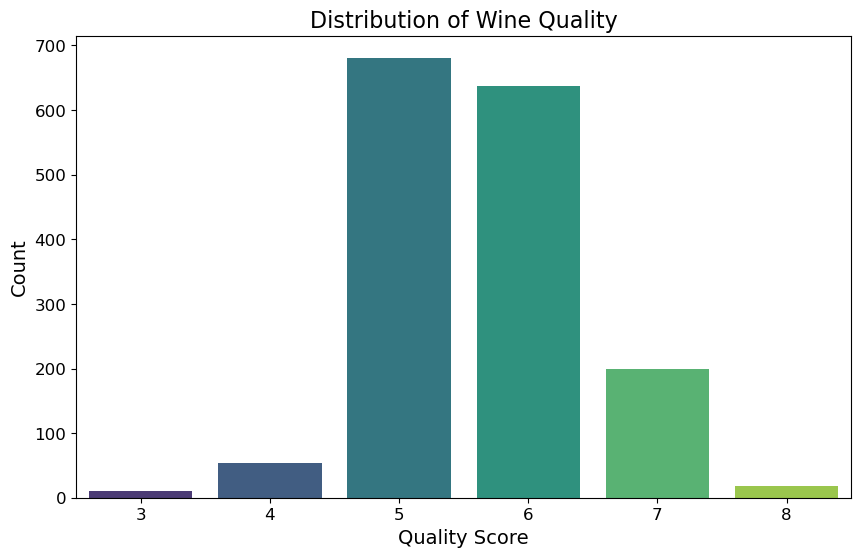

In [12]:
# quality 값의 분포 계산
quality_counts = df['quality'].value_counts()

# 그래프 생성
plt.figure(figsize=(10, 6))
sns.barplot(x=quality_counts.index, y=quality_counts.values, palette="viridis")

# 그래프 제목 및 축 레이블 추가
plt.title('Distribution of Wine Quality', fontsize=16)
plt.xlabel('Quality Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 그래프 표시
plt.show()

퀄리티 컬럼의 분포가 3~8로 이루어져 있는데, 데이터 양의 차이가 많이남.

그러나, 정규분포 비슷한 형태를 띄기에 전처리를 잘하면 선형 회귀로 유의미한 결과를 얻을 수 있을 것 같다.

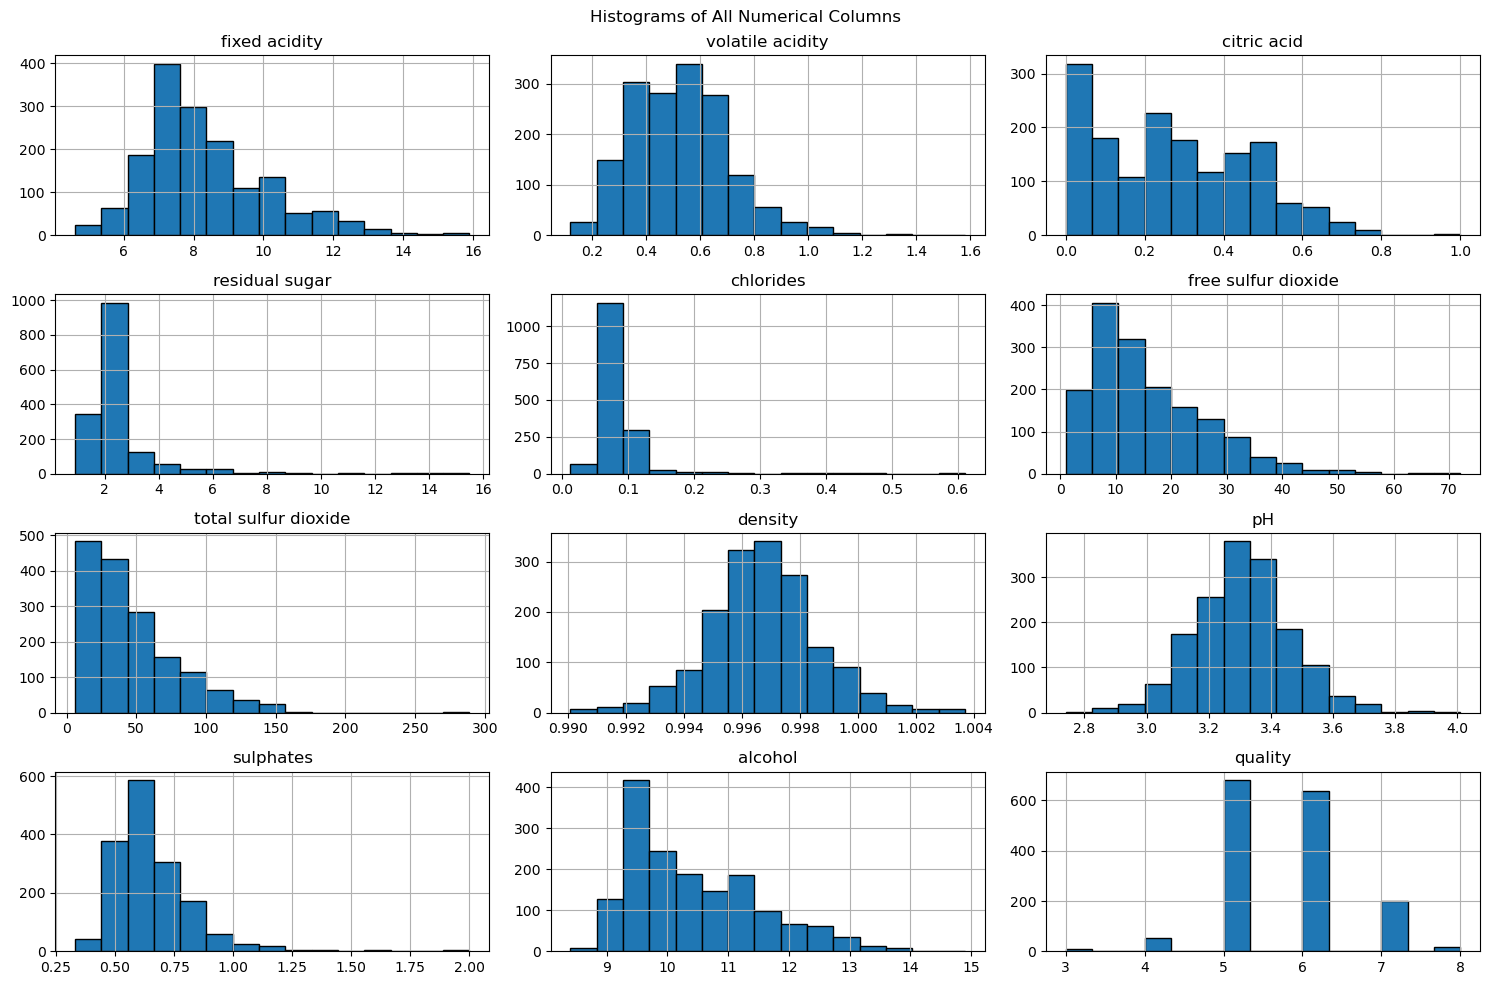

In [24]:
# 히스토그램으로 전체 컬럼 분포 확인
df.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms of All Numerical Columns")
plt.tight_layout()
plt.show()

모든 컬럼의 분포를 보기위해 히스토그램 그래프를 그려봄.

정규분포를 띄거나, 오른쪽으로 꼬리가 긴 형태의 그래프를 대부분 보여주고 있음.

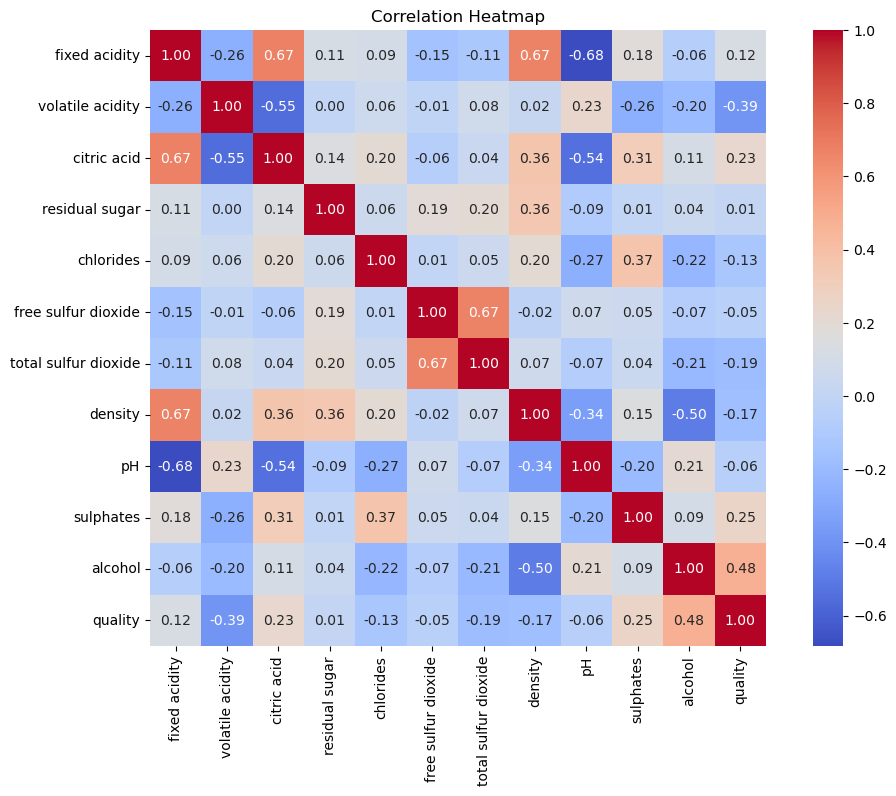

In [25]:
# 상관관계 히트맵
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [29]:
# quality와 상관계수가 높은 순서대로 상관계수 확인
top_correlations = corr_matrix['quality'].drop('quality').sort_values(ascending=False)
print("Top 10 High Correlation Pairs with quality:\n", top_correlations)

Top 10 High Correlation Pairs with quality:
 alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


quality컬럼은 alcohol 컬럼과 가장 양의 상관관계가 높음을 확인하였다. 즉, alcohol값이 증가하면 quality값이 증가하는 비례 관계를 보임.

또한 volatile acidity와 가장 음의 상관관계가 높다. 즉, volatile acidity값이 증가하면 quality값이 감소하는 반비례 관계를 보임.